In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def set_shared_ylabel(a, ylabel, labelpad = 0.01):
    """Set a y label shared by multiple axes
    Parameters
    ----------
    a: list of axes
    ylabel: string
    labelpad: float
        Sets the padding between ticklabels and axis label"""

    f = a[0].get_figure()
    f.canvas.draw() #sets f.canvas.renderer needed below

    # get the center position for all plots
    top = a[0].get_position().y1
    bottom = a[-1].get_position().y0

    # get the coordinates of the left side of the tick labels 
    x0 = 1
    for at in a:
        at.set_ylabel('') # just to make sure we don't and up with multiple labels
        bboxes, _ = at.yaxis.get_ticklabel_extents(f.canvas.renderer)
        bboxes = bboxes.inverse_transformed(f.transFigure)
        xt = bboxes.x0
        if xt < x0:
            x0 = xt
    tick_label_left = x0

    # set position of label
    a[-1].set_ylabel(ylabel)
    a[-1].yaxis.set_label_coords(tick_label_left - labelpad,(bottom + top)/2, transform=f.transFigure)


### Create Bar Plots for Small Systems

In [3]:
# set height of bar
coh2_simul_diis = np.array([0.073596072,0.182056733,0.10770202,0.139372822])  
coh2_simul_nodiis = np.array([1.618568438,4.555271374,2.205019348,2.905923345])  
coh2_stw_diis = np.array([1,1,1,1])

# set height of bar
hcn_simul_diis = np.array([0.162015133,0.337121743,0.200898033,0.258566851])
hcn_simul_nodiis = np.array([3.277373915,9.076601593,4.811607337,6.850741523])
hcn_stw_diis = np.array([1,1,1,1])

# set height of bar
fhf_simul_diis = np.array([0.259174223,0.919942565,0.415527326,0.590399957])
fhf_simul_nodiis = np.array([5.399462972,13.32737305,7.233952986,10.79588493])
fhf_stw_diis = np.array([1,1,1,1])

In [4]:
# set width of bar
barWidth = 0.1

# Set position of bar on X axis
br1 = np.arange(len(coh2_simul_diis))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

/Users/aodongliu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  # This is added back by InteractiveShellApp.init_path()
/Users/aodongliu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: 
The inverse_transformed function was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use transformed(transform.inverted()) instead.
/Users/aodongliu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/Users/aodongliu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/Users/aodongliu/opt/anaconda3/lib/python3.7/site-packages/IPython/core/p

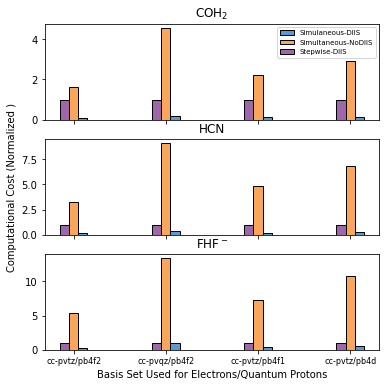

In [5]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1,figsize =(6, 6), sharex=True, sharey='row', gridspec_kw={'hspace': 0.2},tight_layout=True)
# fig = plt.figure(figsize =(16, 8),tight_layout=True)
# ax1 = fig.add_subplot(311)
# ax2 = fig.add_subplot(312)
# ax3 = fig.add_subplot(313)

ax1.bar(br3, coh2_simul_diis, color ='#599ad3', width = barWidth,
        edgecolor ='black', label ='Simulaneous-DIIS')
ax1.bar(br2, coh2_simul_nodiis, color ='#f9a65a', width = barWidth,
        edgecolor ='black', label ='Simultaneous-NoDIIS')
ax1.bar(br1, coh2_stw_diis, color ='#9e66ab', width = barWidth,
        edgecolor ='black', label ='Stepwise-DIIS')
ax1.legend(loc='upper right', fontsize=7)
# ax1.set_xticks([r + barWidth for r in range(len(coh2_simul_diis))])
# ax1.set_xticklabels(['cc-pvtz/pb4f2', 'cc-pvqz/pb4f2', 'cc-pvtz/pb4f1', 'cc-pvtz/pb4d'],fontsize=8)


ax2.bar(br3, hcn_simul_diis, color ='#599ad3', width = barWidth,
        edgecolor ='black', label ='Simul-DIIS')
ax2.bar(br2, hcn_simul_nodiis, color ='#f9a65a', width = barWidth,
        edgecolor ='black', label ='Simul-NoDIIS')
ax2.bar(br1, hcn_stw_diis, color ='#9e66ab', width = barWidth,
        edgecolor ='black', label ='STW-DIIS')
# ax2.set_xticks([r + barWidth for r in range(len(coh2_simul_diis))])
# ax2.set_xticklabels(['cc-pvtz/pb4f2', 'cc-pvqz/pb4f2', 'cc-pvtz/pb4f1', 'cc-pvtz/pb4d'],fontsize=8)


ax3.bar(br3, fhf_simul_diis, color ='#599ad3', width = barWidth,
        edgecolor ='black', label ='Simultaneous-DIIS')
ax3.bar(br2, fhf_simul_nodiis, color ='#f9a65a', width = barWidth,
        edgecolor ='black', label ='Simultaneous-NoDIIS')
ax3.bar(br1, fhf_stw_diis, color ='#9e66ab', width = barWidth,
        edgecolor ='black', label ='Stepwise-DIIS')
ax3.set_xticks([r + barWidth for r in range(len(coh2_simul_diis))])
ax3.set_xticklabels(['cc-pvtz/pb4f2', 'cc-pvqz/pb4f2', 'cc-pvtz/pb4f1', 'cc-pvtz/pb4d'],fontsize=8)
#ax3.set_yticks(np.arange(0, max(fhf_simul_nodiis)+1, 2))

ax1.title.set_text('COH$_2$')
ax2.title.set_text('HCN')
ax3.title.set_text('FHF$^-$')


plt.xlabel("Basis Set Used for Electrons/Quantum Protons")
set_shared_ylabel((ax1, ax2, ax3), 'Computational Cost (Normalized )')


plt.savefig('small_system_AlgvsCompCost.pdf',dpi=600)
plt.show()


### Create Bar Plots for Protonated Water Tetramer

In [6]:
# set height of bar
TetraH2O_simul_diis = np.array([0.167362977,0.160866967,0.157324061,0.171695507])  
TetraH2O_simul_nodiis = np.array([2.470596322,2.374006457,2.415777295,2.456789079])  
TetraH2O_stw_diis = np.array([1,1,1,1])

In [7]:
# set width of bar
barWidth = 0.1

# Set position of bar on X axis
br1 = np.arange(len(TetraH2O_simul_diis))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

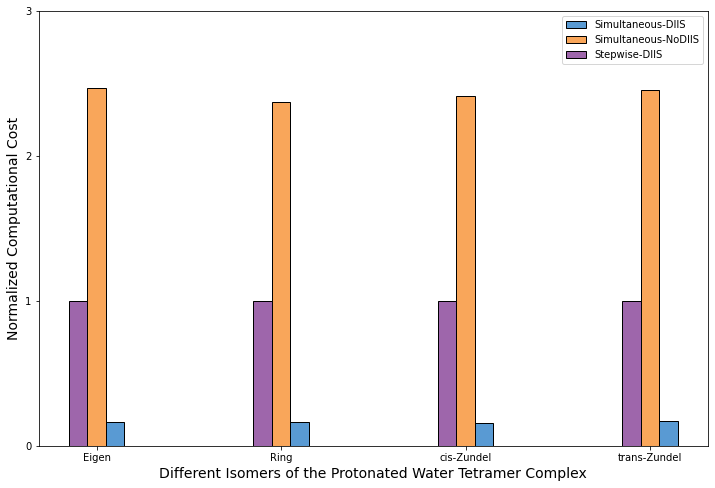

In [8]:
fig = plt.subplots(figsize =(12, 8))
 
# Make the plot
plt.bar(br3, TetraH2O_simul_diis, color ='#599ad3', width = barWidth,
        edgecolor ='black', label ='Simultaneous-DIIS')
plt.bar(br2, TetraH2O_simul_nodiis, color ='#f9a65a', width = barWidth,
        edgecolor ='black', label ='Simultaneous-NoDIIS')
plt.bar(br1, TetraH2O_stw_diis, color ='#9e66ab', width = barWidth,
        edgecolor ='black', label ='Stepwise-DIIS')

# Adding Xticks
plt.xlabel('Basis Sets')
plt.ylabel('# of Fock Builds')
plt.xticks([r + barWidth for r in range(len(TetraH2O_simul_diis))],
        ['Eigen', 'Ring', 'cis-Zundel', 'trans-Zundel'])
plt.yticks(np.arange(0,4, 1))

plt.legend(loc='upper right')
plt.xlabel("Different Isomers of the Protonated Water Tetramer Complex",fontsize=14)
plt.ylabel("Normalized Computational Cost",fontsize=14)

plt.savefig('4H2O_AlgvsCompCost.pdf',dpi=600)
plt.show()

In [29]:
# Average Saving for the 4H2O+
np.average(TetraH2O_simul_diis)

0.164312378

In [37]:
# Average Saving for the Small System
np.average(np.concatenate((coh2_simul_diis,hcn_simul_diis,fhf_simul_diis)),axis=None)

0.3038644565

In [36]:
1-0.164312378

0.835687622